In [1217]:

jupyter BeautifulSoup_test.ipynb --to slides

SyntaxError: invalid syntax (<ipython-input-1217-5871896ca5ca>, line 2)

In [ ]:



 Oil prices have fallen sharply since the summer of 2014.  Prices bottomed in February 2016, 
 since then they have gradually increased and some what stabilized.  While the breakeven cost is a popular
 topic among investors, on the consumer side gasoline prices were / are very cheap.  I recall buying gasoline 
 at under $2/gallon in New Jersey for a bit.  With energy prices trading relatively low compared to 2014 prices,
 I wonder what consumers are doing with the extra cash they are saving? 





In [ ]:
                                         The Dataset
    
 Using website search terms provided by Google trends I take a look at the relationship between
 some web search terms and gasoline prices, is there a possible relationship?

 Applying Beautiful Soup I retrieve daily prices from the U.S. Energy Information Administration (EIA) and store 
 them in a MongoDB database.  Although the EIA provides daily prices on a weekly basis via excel, the most recent 
 (yesterdays close) must be scrapped, paid for, or you wait a week for them to update the website. My primary 
 concern was pulling the correct data, since the order of the prices could change at anytime without my knowledge.  
 So I decided to include the crude/product name as the lookup tool returning the position of the element.  To this 
 I added the distance of the price to the element return the exact position of the price.  

  Below is an example of the code I used for WTI:

  WTI=[i for i, x in enumerate(WebScappedData) if x.text == 'WTI']

  WTI_pr=WTI[0]+1

  This solves the problem by avoiding errors if the order of the prices is changed.
    

In [3]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import unicodedata
import urllib
#import urllib.request
from bs4 import BeautifulSoup
import requests

eia_url= 'http://www.eia.gov/todayinenergy/prices.cfm'

eia = requests.get(eia_url).text
eia = BeautifulSoup(eia)

print eia.prettify()



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="en-us" http-equiv="Content-Language"/>
  <meta content="all" name="robots"/>
  <meta content="EIA - Energy Information Administration" name="agency"/>
  <meta content="official energy statistics, data, analysis and forecasting" name="subject"/>
  <meta content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" name="Description"/>
  <link href="/global/styles/screen.css" media="screen, projection" rel="stylesheet" type="text/css"/>
  <link href="/global/scripts/jquery/datepicker/jquery-ui-dp.custom.css" rel="stylesheet" type="text/css"/>
  <link href="/global/styles/EIA_global.css" media="screen, projecti

/Users/AlexandKelly/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
prices = eia.find_all('table')

In [5]:
len(prices)

3

In [6]:
prices[0].find_all(lambda x: x.text=='WTI')

[<td class="s2">WTI</td>]

In [7]:
prices[0].find_all(lambda x: x.text=='Brent')

[<td class="s2">Brent</td>]

In [115]:
prices[0].findAll('tr')[10]

<tr>\n<td class="s1" rowspan="2">Heating Oil<br/> ($/gallon)</td>\n<td class="s2">NY Harbor</td>\n\n<td class="up">+1.9</td>\n</tr>

In [174]:
prices[0].findAll('td')

[<td colspan="4">\n<b>Wholesale Spot Petroleum Prices, 5/17/16 Close</b>\n</td>,
 <td class="s1" rowspan="3">Crude Oil<br/> ($/barrel)</td>,
 <td class="s2">WTI</td>,
 <td class="d1">48.29</td>,
 <td class="up">+1.2</td>,
 <td class="s2">Brent</td>,
 <td class="d1">48.71</td>,
 <td class="up">+0.5</td>,
 <td class="s2">Louisiana Light</td>,
 <td class="d1">50.34</td>,
 <td class="up">+1.2</td>,
 <td class="s1" rowspan="3">Gasoline (RBOB)<br/> ($/gallon)</td>,
 <td class="s2">NY Harbor</td>,
 <td class="d1">1.63</td>,
 <td class="up">+2.0</td>,
 <td class="s2">Gulf Coast</td>,
 <td class="d1">1.50</td>,
 <td class="up">+2.8</td>,
 <td class="s2">Los Angeles</td>,
 <td class="d1">1.54</td>,
 <td class="up">+1.5</td>,
 <td class="s1" rowspan="2">Heating Oil<br/> ($/gallon)</td>,
 <td class="s2">NY Harbor</td>,
 <td class="up">+1.9</td>,
 <td class="s2">Gulf Coast</td>,
 <td class="d1">1.30</td>,
 <td class="up">+2.2</td>,
 <td class="s1"><a class="lbox" href="/todayinenergy/includes/Crack

In [110]:
for td in prices[0].findAll("td", { "class" : "s2" }):
    print td.text
for td in prices[0].findAll("td", { "class" : "up" }):
    print td.text

WTI
Brent
Louisiana Light
NY Harbor
Gulf Coast
Los Angeles
NY Harbor
Gulf Coast
Gulf Coast (LLS)
NY Harbor
Gulf Coast
Los Angeles
Mont Belvieu, TX
Conway, KS
U.S. Average
U.S. Average
+1.2
+0.5
+1.2
+2.0
+2.8
+1.5
+1.9
+2.2
+9.7
+2.1
+2.4
+2.5
+0.2
+0.6
+0.3
+0.8


In [9]:
#z.find_all(lambda x: x.text=='WTI')

testlist=[1,2,3,1,4,6,9,1]
L

[i for i, x in enumerate(testlist) if x == 1]

NameError: name 'L' is not defined

In [10]:
### this returns the row of the title of the crude/product 
### but we want the title row plus 1 since the following row holds the prices

Date=z[0]
WTI=[i for i, x in enumerate(z) if x.text == 'WTI']

WTI_pr=WTI[0]+1

Brent=[i for i, x in enumerate(z) if x.text == 'Brent']

Brent_pr=Brent[0]+1

LLS=[i for i, x in enumerate(z) if x.text == 'Louisiana Light'] 

LLS_pr=LLS[0]+1

NYH=[i for i, x in enumerate(z) if x.text == 'NY Harbor'] # order Gasoline (RBOB), Heating Oil, Low-Sulfur Diesel in $/g

NYH_rbob_pr=NYH[0]+1

NYH_diesel_pr=NYH[1]+1

NYH_ls_diesel_pr=NYH[2]+1

USG=[i for i, x in enumerate(z) if x.text == 'Gulf Coast'] # order Gasoline (RBOB), Heating Oil, Low-Sulfur Diesel in $/g

USG_rbob_pr=USG[0]+1

USG_diesel_pr=USG[1]+1

USG_ls_diesel_pr=USG[2]+1


USWC=[i for i, x in enumerate(z) if x.text == 'Los Angeles'] # order Gasoline (RBOB), Low-Sulfur Diesel in $/g

USWC_rbob_pr=USWC[0]+1

USWC_ls_diesel_pr=USWC[1]+1

PropaneMB=[i for i, x in enumerate(z) if x.text == 'Mont Belvieu, TX'] # Propane Prices

PropaneMB_pr=PropaneMB[0]+1

Retail=[i for i, x in enumerate(z) if x.text == 'U.S. Average'] # Regular Gasoline Prices & Regular Diesel Prices

Retail_gas_pr=Retail[0]+1

Retail_diesel_pr=Retail[1]+1

USGLLS321=[i for i, x in enumerate(z) if x.text == 'Gulf Coast (LLS)']  # 3:2:1 Crack spread $/bbl



In [227]:
#import re

#print re.search('Prices, ? Close', z[0].text) == None
#Date=z[0]
#Date.text

z[0].text



u'\nWholesale Spot Petroleum Prices, 5/17/16 Close\n'

In [11]:
type(WTI)


list

In [117]:
WTI_pr

3

In [13]:
NYH[0]+1

13

In [14]:
z[NYH_diesel_pr]

<td class="d1">1.40</td>

In [93]:
z[2]

<td class="s2">WTI</td>

In [40]:
type(y)

unicode

[<td colspan="4">\n<b>Wholesale Spot Petroleum Prices, 5/17/16 Close</b>\n</td>,
 <td class="s1" rowspan="3">Crude Oil<br/> ($/barrel)</td>,
 <td class="s2">WTI</td>,
 <td class="d1">48.29</td>,
 <td class="up">+1.2</td>,
 <td class="s2">Brent</td>,
 <td class="d1">48.71</td>,
 <td class="up">+0.5</td>,
 <td class="s2">Louisiana Light</td>,
 <td class="d1">50.34</td>,
 <td class="up">+1.2</td>,
 <td class="s1" rowspan="3">Gasoline (RBOB)<br/> ($/gallon)</td>,
 <td class="s2">NY Harbor</td>,
 <td class="d1">1.63</td>,
 <td class="up">+2.0</td>,
 <td class="s2">Gulf Coast</td>,
 <td class="d1">1.50</td>,
 <td class="up">+2.8</td>,
 <td class="s2">Los Angeles</td>,
 <td class="d1">1.54</td>,
 <td class="up">+1.5</td>,
 <td class="s1" rowspan="2">Heating Oil<br/> ($/gallon)</td>,
 <td class="s2">NY Harbor</td>,
 <td class="d1">1.40</td>,
 <td class="up">+1.9</td>,
 <td class="s2">Gulf Coast</td>,
 <td class="d1">1.30</td>,
 <td class="up">+2.2</td>,
 <td class="s1"><a class="lbox" href="/t

In [82]:
#Date=[i for i, x in enumerate(z) if x.text == 'Wholesale']
#Date


#prices[0][0]

In [42]:
unicodedata.normalize('NFKD', z[NYH_diesel_pr].text).encode('ascii','ignore')

'1.40'

In [54]:
import pymongo


In [56]:

# Connection to Mongo DB
try:
    conn=pymongo.MongoClient()
    print "Connected successfully!!!"
except pymongo.errors.ConnectionFailure, e:
   print "Could not connect to MongoDB: %s" % e 
conn

Connected successfully!!!


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [59]:
db = conn.mydb
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'mydb')

In [60]:
conn.database_names()

[u'demo', u'local', u'test']

In [61]:
collection = db.my_collection
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'mydb'), u'my_collection')

In [62]:
db.collection_names()

[]

In [85]:
z

[<td colspan="4">\n<b>Wholesale Spot Petroleum Prices, 5/17/16 Close</b>\n</td>,
 <td class="s1" rowspan="3">Crude Oil<br/> ($/barrel)</td>,
 <td class="s2">WTI</td>,
 <td class="d1">48.29</td>,
 <td class="up">+1.2</td>,
 <td class="s2">Brent</td>,
 <td class="d1">48.71</td>,
 <td class="up">+0.5</td>,
 <td class="s2">Louisiana Light</td>,
 <td class="d1">50.34</td>,
 <td class="up">+1.2</td>,
 <td class="s1" rowspan="3">Gasoline (RBOB)<br/> ($/gallon)</td>,
 <td class="s2">NY Harbor</td>,
 <td class="d1">1.63</td>,
 <td class="up">+2.0</td>,
 <td class="s2">Gulf Coast</td>,
 <td class="d1">1.50</td>,
 <td class="up">+2.8</td>,
 <td class="s2">Los Angeles</td>,
 <td class="d1">1.54</td>,
 <td class="up">+1.5</td>,
 <td class="s1" rowspan="2">Heating Oil<br/> ($/gallon)</td>,
 <td class="s2">NY Harbor</td>,
 <td class="d1">1.40</td>,
 <td class="up">+1.9</td>,
 <td class="s2">Gulf Coast</td>,
 <td class="d1">1.30</td>,
 <td class="up">+2.2</td>,
 <td class="s1"><a class="lbox" href="/t

In [68]:
from datetime import datetime

In [119]:
class DailyPrices():
    # Daily prices are from eia
    # name: crude/prod name
    # 
    # Price: 
    
    
    def __init__(self, name, date, price):
        # Each(Date, Price) position.
        self.Name = name
        self.Date = date
        self.Price = price

In [121]:
price1 = DailyPrices('John', '05/06', '120')

In [124]:
NY = {"name": "NY", "date": "05/06", "price": 120}

In [125]:
import pymongo
# Connection to Mongo DB
try:
    conn=pymongo.MongoClient()
    print "Connected successfully!!!"
except pymongo.errors.ConnectionFailure, e:
    print "Could not connect to MongoDB: %s" % e 
conn

Connected successfully!!!


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [126]:
conn.database_names()

[u'demo', u'local', u'test']

In [127]:
db = conn['daily_prices']

In [128]:
collection = db.price

In [129]:
collection.insert(NY)

/Users/AlexandKelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if __name__ == '__main__':


ObjectId('573e1ec4be4ca14e757c8997')

In [ ]:
NY = {"name": "WTI", "date": Date, "price":WTI_pr=WTI[0]+1 }

In [133]:
z[WTI_pr].text

u'48.29'

In [134]:
unicodedata.normalize('NFKD', z[WTI_pr].text).encode('ascii','ignore')

'48.29'

In [169]:
def get_eia_prices1 (x):
    return unicodedata.normalize('NFKD', z[x].text).encode('ascii','ignore')


In [170]:
get_eia_prices1(WTI_pr)

'48.29'

In [359]:
import unicodedata
import urllib
from bs4 import BeautifulSoup
import requests

eia_url= 'http://www.eia.gov/todayinenergy/prices.cfm'

eia = requests.get(eia_url).text
eia = BeautifulSoup(eia)

prices = eia.find_all('table')

z=prices[0].findAll('td')


In [360]:

WTI=[i for i, x in enumerate(z) if x.text == 'WTI']
WTI_pr=WTI[0]+1
Brent=[i for i, x in enumerate(z) if x.text == 'Brent']
Brent_pr=Brent[0]+1
LLS=[i for i, x in enumerate(z) if x.text == 'Louisiana Light'] 
LLS_pr=LLS[0]+1
NYH=[i for i, x in enumerate(z) if x.text == 'NY Harbor'] # order Gasoline (RBOB), Heating Oil, Low-Sulfur Diesel in $/g
NYH_rbob_pr=NYH[0]+1
NYH_diesel_pr=NYH[1]+1
NYH_ls_diesel_pr=NYH[2]+1
USG=[i for i, x in enumerate(z) if x.text == 'Gulf Coast'] # order Gasoline (RBOB), Heating Oil, Low-Sulfur Diesel in $/g
USG_rbob_pr=USG[0]+1
USG_diesel_pr=USG[1]+1
USG_ls_diesel_pr=USG[2]+1
USWC=[i for i, x in enumerate(z) if x.text == 'Los Angeles'] # order Gasoline (RBOB), Low-Sulfur Diesel in $/g
USWC_rbob_pr=USWC[0]+1
USWC_ls_diesel_pr=USWC[1]+1
PropaneMB=[i for i, x in enumerate(z) if x.text == 'Mont Belvieu, TX'] # Propane Prices
PropaneMB_pr=PropaneMB[0]+1
Retail=[i for i, x in enumerate(z) if x.text == 'U.S. Average'] # Regular Gasoline Prices & Regular Diesel Prices
Retail_gas_pr=Retail[0]+1
Retail_diesel_pr=Retail[1]+1
USGLLS321=[i for i, x in enumerate(z) if x.text == 'Gulf Coast (LLS)']  # 3:2:1 Crack spread $/bbl

#pr_list=[WTI_pr, Brent_pr, LLS_pr,
#      NYH_rbob_pr, NYH_diesel_pr,
#      NYH_ls_diesel_pr, USG_rbob_pr,
#      USG_diesel_pr, USG_ls_diesel_pr,
#      USWC_rbob_pr, USWC_ls_diesel_pr,
#      PropaneMB_pr, Retail_gas_pr,
#      Retail_diesel_pr]



In [357]:
#import pymongo
# Connection to Mongo DB
#try:
#    conn=pymongo.MongoClient()
#    print "Connected successfully!!!"
#except pymongo.errors.ConnectionFailure, e:
#    print "Could not connect to MongoDB: %s" % e 
#conn
#
#db = conn['daily_prices']
#
#collection = db.price
#
#collection.insert(Dailys)

In [358]:
#Dailys = {"name": pr_names, "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7], "price":
#          map(lambda x: unicodedata.normalize('NFKD', z[x].text).encode('ascii','ignore'), pr_list)
#         }
#
#Dailys


In [ ]:
#Dailys = {"name": pr_names, "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7], "price":
#          map(lambda x: unicodedata.normalize('NFKD', z[x].text).encode('ascii','ignore'), pr_list)
#         }
#
#Dailys

In [361]:
Dailys = {"name": 'WTI_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[WTI_pr].text).encode('ascii','ignore')
    }, {"name": 'Brent_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[Brent_pr].text).encode('ascii','ignore')
    }, {"name": 'LLS_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[LLS_pr].text).encode('ascii','ignore')
    }, {"name": 'NYH_rbob_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[NYH_rbob_pr].text).encode('ascii','ignore')
    }, {"name": 'NYH_diesel_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[NYH_diesel_pr].text).encode('ascii','ignore')
    }, {"name": 'NYH_ls_diesel_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[NYH_ls_diesel_pr].text).encode('ascii','ignore')
    }, {"name": 'USG_rbob_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[USG_rbob_pr].text).encode('ascii','ignore')
    }, {"name": 'USG_diesel_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[USG_diesel_pr].text).encode('ascii','ignore')
    }, {"name": 'USG_ls_diesel_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[USG_ls_diesel_pr].text).encode('ascii','ignore')
    }, {"name": 'USWC_rbob_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[USWC_rbob_pr].text).encode('ascii','ignore')
    }, {"name": 'USWC_ls_diesel_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[USWC_ls_diesel_pr].text).encode('ascii','ignore')
    }, {"name": 'PropaneMB_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[PropaneMB_pr].text).encode('ascii','ignore')
    }, {"name": 'Retail_gas_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[Retail_gas_pr].text).encode('ascii','ignore')
    }, {"name": 'Retail_diesel_pr',
     "date": unicodedata.normalize('NFKD', z[0].text).encode('ascii','ignore')[-15:-7],
     "price":unicodedata.normalize('NFKD', z[Retail_diesel_pr].text).encode('ascii','ignore')
    }





In [355]:
pd.DataFrame(data)

,_id,date,name,price
0,573e1ec4be4ca14e757c8997,05/06,NY,120
1,573e4a37be4ca14e757c8998,[],WTI,3
2,573e6372be4ca14e757c8999,5/17/16,"[WTI_pr, Brent_pr, LLS_pr, NYH_rbob_pr, NYH_di...","[48.29, 48.71, 50.34, 1.63, 1.40, 1.47, 1.50, ..."
3,573e6400be4ca14e757c899a,5/17/16,"[WTI_pr, Brent_pr, LLS_pr, NYH_rbob_pr, NYH_di...","[48.29, 48.71, 50.34, 1.63, 1.40, 1.47, 1.50, ..."
4,573e6456be4ca14e757c899b,5/18/16,"[WTI_pr, Brent_pr, LLS_pr, NYH_rbob_pr, NYH_di...","[48.12, 48.93, 50.12, 1.63, 1.41, 1.48, 1.50, ..."
5,573e6484be4ca14e757c899c,5/18/16,"[WTI_pr, Brent_pr, LLS_pr, NYH_rbob_pr, NYH_di...","[48.12, 48.93, 50.12, 1.63, 1.41, 1.48, 1.50, ..."
6,573f5dccbe4ca14e757c899d,5/18/16,WTI_pr,48.12
7,573f5dccbe4ca14e757c899e,5/18/16,Brent_pr,48.93
8,573f5dccbe4ca14e757c899f,5/18/16,LLS_pr,50.12
9,573f5dccbe4ca14e757c89a0,5/18/16,NYH_rbob_pr,1.63


In [365]:
import pymongo
# Connection to Mongo DB
try:
    conn=pymongo.MongoClient()
    print "Connected successfully!!!"
except pymongo.errors.ConnectionFailure, e:
    print "Could not connect to MongoDB: %s" % e 
conn

db = conn['daily_prices']

collection = db.price

collection.insert(Dailys)

Connected successfully!!!


/Users/AlexandKelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


[ObjectId('573f6c46be4ca14e757c89ab'),
 ObjectId('573f6c46be4ca14e757c89ac'),
 ObjectId('573f6c46be4ca14e757c89ad'),
 ObjectId('573f6c46be4ca14e757c89ae'),
 ObjectId('573f6c46be4ca14e757c89af'),
 ObjectId('573f6c46be4ca14e757c89b0'),
 ObjectId('573f6c46be4ca14e757c89b1'),
 ObjectId('573f6c46be4ca14e757c89b2'),
 ObjectId('573f6c46be4ca14e757c89b3'),
 ObjectId('573f6c46be4ca14e757c89b4'),
 ObjectId('573f6c46be4ca14e757c89b5'),
 ObjectId('573f6c46be4ca14e757c89b6'),
 ObjectId('573f6c46be4ca14e757c89b7'),
 ObjectId('573f6c46be4ca14e757c89b8')]

In [447]:
import pymongo
import pandas as pd
from pymongo import MongoClient

db = MongoClient().daily_prices#database name is daily_prices
input_data = db.price#what to fill the data with collection name is price #### Documents are like observations within the collection
data = pd.DataFrame(list(input_data.find()))#

In [525]:
#df=data.groupby('date')
#data
#df=df2.groupby('date')
#pd.pivot_table(df,index=["date"])

#df2=data.drop([0,1,2,3,4,5])
#df2=df2.drop('_id', axis=1)
#df2
#df=df2.groupby('date'])
#df2.groupby(['date']).sum()
#df2

import numpy as np
final=pd.pivot_table(df2,index=["date"],values=["price"],
               columns=["name"],aggfunc=[np.sum])


final2=pd.pivot_table(df2,index=["name"],values=["price"],
               columns=["date"],aggfunc=[np.sum])
final2


sum         
                     price         
date               5/18/16  5/19/16
name                               
Brent_pr             48.93    47.01
LLS_pr               50.12    50.19
NYH_diesel_pr         1.41     1.41
NYH_ls_diesel_pr      1.48     1.47
NYH_rbob_pr           1.63     1.62
PropaneMB_pr          0.56     0.54
Retail_diesel_pr      2.25     2.26
Retail_gas_pr         2.26     2.27
USG_diesel_pr         1.30     1.30
USG_ls_diesel_pr      1.43     1.43
USG_rbob_pr           1.50     1.50
USWC_ls_diesel_pr     1.48     1.49
USWC_rbob_pr          1.53     1.51
WTI_pr               48.12    48.16

In [1160]:
df2=data.drop([0,1,2,3,4,5])
df2=df2.drop('_id', axis=1)

RetailGasolinePrice=df2.loc[df2['name'] == 'Retail_gas_pr']


In [1012]:
monthlyretailpr=pd.read_csv('MonthlyRetailPr.csv')
monthlyretailpr

monthlyproductsupply=pd.read_csv('MonthlyProductSupply.csv')
monthlyproductsupply

Dessert=pd.read_csv('Dessert.csv')
Dessert

HappyHour=pd.read_csv('HappyHour.csv')
HappyHour

shoppingmalls=pd.read_csv('shoppingmalls.csv')
shoppingmalls

newborns=pd.read_csv('newborns.csv')
newborns

organicfoodindustry=pd.read_csv('organicfoodindustry.csv')
organicfoodindustry

StarwoodsHotelsResorts=pd.read_csv('StarwoodsHotelsResorts.csv')
StarwoodsHotelsResorts

yoga=pd.read_csv('yoga.csv')
yoga
    
Home_Improvement=pd.read_csv('Home_Improvement.csv')
Home_Improvement

Restaurant=pd.read_csv('Restaurant.csv')
Restaurant

Mercedes_Benz=pd.read_csv('Mercedes_Benz.csv')
Mercedes_Benz


,Week,Mercedes-Benz
0,2005-01-02 - 2005-01-08,88
1,2005-01-09 - 2005-01-15,93
2,2005-01-16 - 2005-01-22,94
3,2005-01-23 - 2005-01-29,93
4,2005-01-30 - 2005-02-05,92
5,2005-02-06 - 2005-02-12,95
6,2005-02-13 - 2005-02-19,95
7,2005-02-20 - 2005-02-26,93
8,2005-02-27 - 2005-03-05,97
9,2005-03-06 - 2005-03-12,96


In [1013]:
Dessert[[0]]

,Week
0,2005-01-02 - 2005-01-08
1,2005-01-09 - 2005-01-15
2,2005-01-16 - 2005-01-22
3,2005-01-23 - 2005-01-29
4,2005-01-30 - 2005-02-05
5,2005-02-06 - 2005-02-12
6,2005-02-13 - 2005-02-19
7,2005-02-20 - 2005-02-26
8,2005-02-27 - 2005-03-05
9,2005-03-06 - 2005-03-12


In [1014]:
Dessert['WeekEnding'] = Dessert['Week'].str[13:]
HappyHour['WeekEnding'] = HappyHour['Week'].str[13:]
newborns['WeekEnding'] = newborns['Week'].str[13:]
organicfoodindustry['WeekEnding'] = organicfoodindustry['Week'].str[13:]
StarwoodsHotelsResorts['WeekEnding'] = StarwoodsHotelsResorts['Week'].str[13:]
yoga['WeekEnding'] = yoga['Week'].str[13:]
Home_Improvement['WeekEnding'] = Home_Improvement['Week'].str[13:]
Restaurant['WeekEnding'] = Restaurant['Week'].str[13:]
Mercedes_Benz['WeekEnding'] = Mercedes_Benz['Week'].str[13:]

In [1017]:

Dessert=Dessert.drop('Week', axis=1)
HappyHour=HappyHour.drop('Week', axis=1)
newborns=newborns.drop('Week', axis=1)
organicfoodindustry=organicfoodindustry.drop('Week', axis=1)
StarwoodsHotelsResorts=StarwoodsHotelsResorts.drop('Week', axis=1)
yoga=yoga.drop('Week', axis=1)
Home_Improvement=Home_Improvement.drop('Week', axis=1)
Restaurant=Restaurant.drop('Week', axis=1)
Mercedes_Benz=Mercedes_Benz.drop('Week', axis=1)

In [1018]:
a=pd.merge(Dessert, HappyHour, how= 'inner', on ='WeekEnding')
b=pd.merge(a, newborns, how= 'inner', on ='WeekEnding')
c=pd.merge(b, organicfoodindustry, how= 'inner', on ='WeekEnding')
d=pd.merge(c, StarwoodsHotelsResorts, how= 'inner', on ='WeekEnding')
E=pd.merge(d, yoga, how= 'inner', on ='WeekEnding')
f=pd.merge(E, Home_Improvement, how= 'inner', on ='WeekEnding')
g=pd.merge(f, Restaurant, how= 'inner', on ='WeekEnding')
websearchinterest=pd.merge(g, Mercedes_Benz, how= 'inner', on ='WeekEnding')






In [1020]:
#websearchinterest.set_index(['WeekEnding'])

#websearchinterest['WeekEnding'] = Dessert['Week'].str[13:]

#pd.to_datetime('13000101', format='%Y%m%d')

#calendar.month_name[3]

websearchinterest['YYYY-MM'] = websearchinterest['WeekEnding'].str[:7]

websearchinterest


,Dessert,WeekEnding,Happy hour,new borns,Organic food,Starwood Hotels and Resorts Worldwide,Yoga,Home improvement,Restaurant,Mercedes-Benz,YYYY-MM
0,24,2005-01-08,15,56,85,62,66,78,65,88,2005-01
1,26,2005-01-15,19,55,89,67,65,72,70,93,2005-01
2,27,2005-01-22,19,61,84,66,63,80,70,94,2005-01
3,28,2005-01-29,20,45,86,59,60,80,72,93,2005-01
4,29,2005-02-05,21,57,87,61,59,83,77,92,2005-02
5,32,2005-02-12,19,60,88,69,57,77,87,95,2005-02
6,32,2005-02-19,19,65,86,73,55,81,83,95,2005-02
7,29,2005-02-26,21,62,89,68,57,72,69,93,2005-02
8,30,2005-03-05,18,61,87,68,56,72,69,97,2005-03
9,30,2005-03-12,19,76,97,64,57,74,71,96,2005-03


In [1008]:
#websearchinterest=websearchinterest.drop('WeekEnding', axis=1)

In [1021]:
websearchinterest

,Dessert,WeekEnding,Happy hour,new borns,Organic food,Starwood Hotels and Resorts Worldwide,Yoga,Home improvement,Restaurant,Mercedes-Benz,YYYY-MM
0,24,2005-01-08,15,56,85,62,66,78,65,88,2005-01
1,26,2005-01-15,19,55,89,67,65,72,70,93,2005-01
2,27,2005-01-22,19,61,84,66,63,80,70,94,2005-01
3,28,2005-01-29,20,45,86,59,60,80,72,93,2005-01
4,29,2005-02-05,21,57,87,61,59,83,77,92,2005-02
5,32,2005-02-12,19,60,88,69,57,77,87,95,2005-02
6,32,2005-02-19,19,65,86,73,55,81,83,95,2005-02
7,29,2005-02-26,21,62,89,68,57,72,69,93,2005-02
8,30,2005-03-05,18,61,87,68,56,72,69,97,2005-03
9,30,2005-03-12,19,76,97,64,57,74,71,96,2005-03


In [1022]:
websearchinterest=websearchinterest.groupby(['YYYY-MM']).mean()

In [1023]:
websearchinterest.to_csv('websearchinterest.csv')

In [1028]:
total=pd.read_csv('websearchinterest.csv')


In [1029]:
#pd.merge(websearchinterest, a, how= 'left')
#websearchinterest
#monthly_eia.set_index('YYYY-MM')
#pd.merge(websearchinterest, monthly_eia.set_index('YYYY-MM'), how= 'left', on ='YYYY-MM')

total


,YYYY-MM,Date,Dessert,Happy hour,new borns,Organic food,Starwood Hotels and Resorts Worldwide,Yoga,Home improvement,Restaurant,Mercedes-Benz,U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,2005-01,1/1/05,26.25,18.25,54.25,86.00,63.50,63.50,77.50,69.25,92.00,1.875
1,2005-02,2/1/05,30.50,20.00,61.00,87.50,67.75,57.00,78.25,79.00,93.75,1.953
2,2005-03,3/1/05,31.75,18.25,61.50,91.00,66.25,55.75,75.00,70.75,95.25,2.120
3,2005-04,4/1/05,28.60,19.80,57.40,89.80,66.00,53.00,75.60,70.20,94.20,2.285
4,2005-05,5/1/05,30.25,20.75,50.75,87.50,65.00,52.25,66.50,71.50,93.50,2.205
5,2005-06,6/1/05,26.75,22.75,55.25,86.50,63.50,52.00,66.75,69.50,95.75,2.198
6,2005-07,7/1/05,26.40,23.20,55.80,82.40,73.00,54.20,71.00,71.00,94.40,2.333
7,2005-08,8/1/05,25.75,24.50,53.00,95.50,73.00,59.25,70.25,72.50,94.25,2.529
8,2005-09,9/1/05,26.00,22.25,56.25,88.75,63.00,57.25,57.50,67.00,91.75,2.951
9,2005-10,10/1/05,32.20,23.00,55.00,92.40,60.40,53.80,60.60,71.20,89.80,2.765


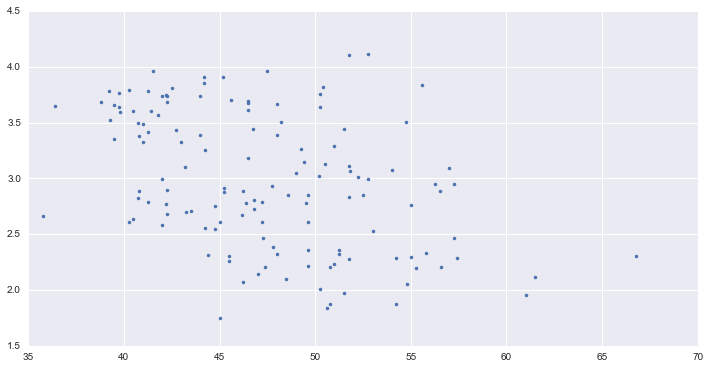

In [1030]:
plt.plot(total['new borns'], total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'],'.')

In [1031]:

total['Date'] =pd.to_datetime(total['Date'])


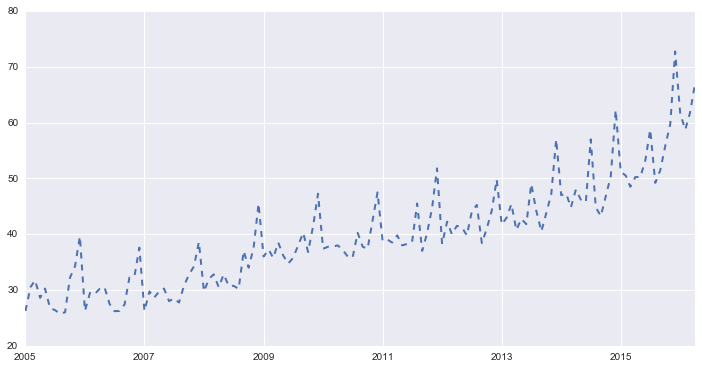

In [1032]:
x = total['Date']

y = total['Dessert']
plt.plot(x, y, '--', linewidth=2)

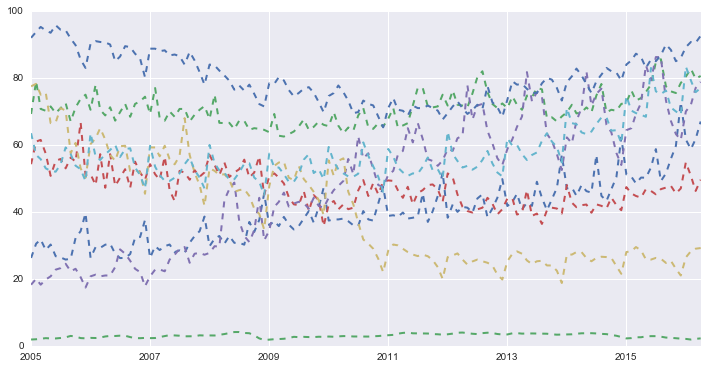

In [1033]:
#import plotly.plotly as py
#import plotly.tools as tls

x = total['Date']
plt.plot(x, total['Dessert'], '--', linewidth=2)
plt.plot(x, total['Restaurant'], '--', linewidth=2)
plt.plot(x, total['new borns'], '--', linewidth=2)
plt.plot(x, total['Happy hour'], '--', linewidth=2)
plt.plot(x, total['Home improvement'], '--', linewidth=2)
plt.plot(x, total['Yoga'], '--', linewidth=2)
plt.plot(x, total['Mercedes-Benz'], '--', linewidth=2)
plt.plot(x, total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], '--', linewidth=2)


#fig = plt.gcf()

#plotly_fig = mpl_to_plotly(fig)
#fig['layout']['showlegend'] = True

#fig = plt.gcf()
#plot_url = py.plot_mpl(fig, filename='mpl-basic-line')

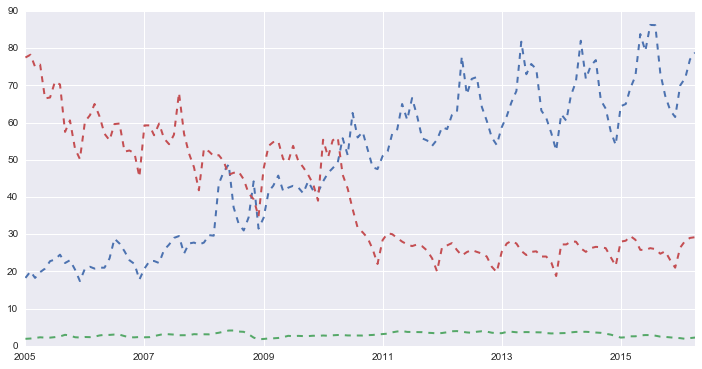

In [1034]:

x = total['Date']
plt.plot(x, total['Happy hour'], '--', linewidth=2)
plt.plot(x, total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], '--', linewidth=2)
plt.plot(x, total['Home improvement'], '--', linewidth=2)

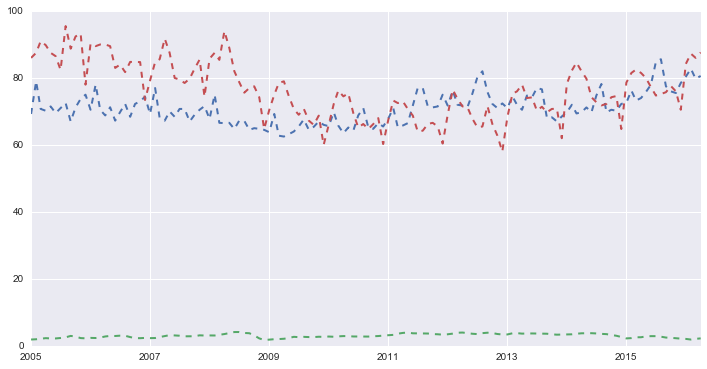

In [1035]:

x = total['Date']
plt.plot(x, total['Restaurant'], '--', linewidth=2)
plt.plot(x, total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], '--', linewidth=2)
plt.plot(x, total['Organic food'], '--', linewidth=2)

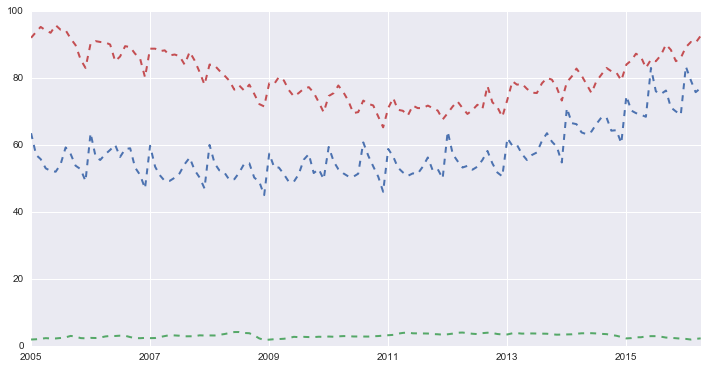

In [1036]:

x = total['Date']
plt.plot(x, total['Yoga'], '--', linewidth=2)
plt.plot(x, total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], '--', linewidth=2)
plt.plot(x, total['Mercedes-Benz'], '--', linewidth=2)

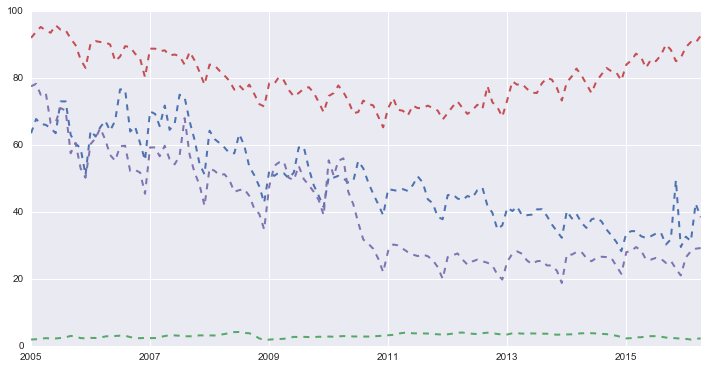

In [1037]:

x = total['Date']
plt.plot(x, total['Starwood Hotels and Resorts Worldwide'], '--', linewidth=2)
plt.plot(x, total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], '--', linewidth=2)
plt.plot(x, total['Mercedes-Benz'], '--', linewidth=2)
plt.plot(x, total['Home improvement'], '--', linewidth=2)

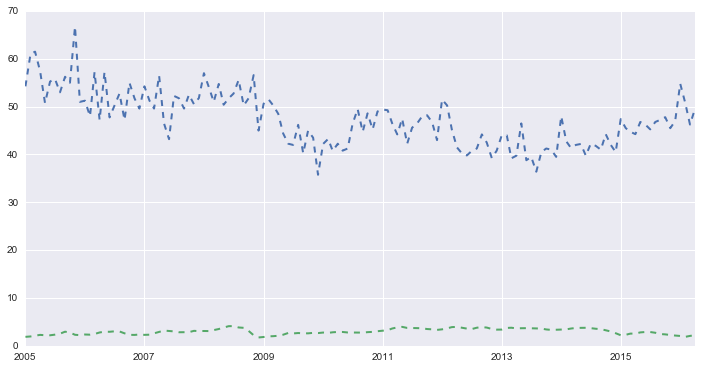

In [1038]:

x = total['Date']
plt.plot(x, total['new borns'], '--', linewidth=2)
plt.plot(x, total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], '--', linewidth=2)


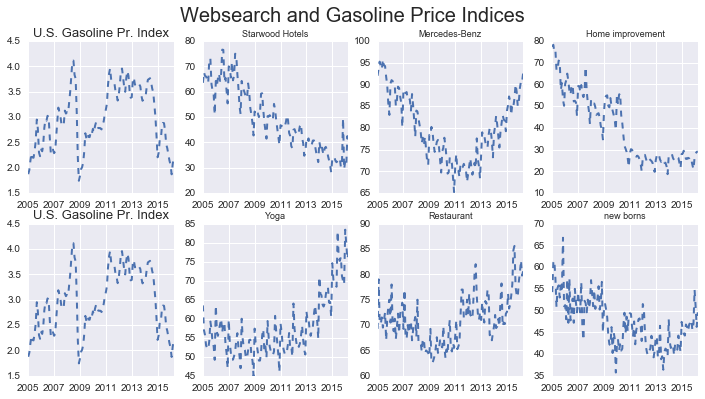

In [1039]:
plt.rcParams['figure.figsize'] = 12, 6
x = total['Date']
# the first subplot
plt.suptitle('Websearch Indices versus Gasoline Price', fontsize=20)
plt.subplot(241)
plt.plot(x, total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], '--', linewidth=2)
#plt.xlabel('Date', fontsize=13)
plt.title('U.S. Gasoline Pr. Index', fontsize=13)
plt.subplot(242)
plt.plot(x, total['Starwood Hotels and Resorts Worldwide'], '--', linewidth=2)
# the second subplot (top-right)
#plt.xlabel('Date', fontsize=13)
plt.title('Starwood Hotels', fontsize=9)
plt.subplot(243)
plt.plot(x, total['Mercedes-Benz'], '--', linewidth=2)
# the third subplot (bottom-left)
#plt.xlabel('Date', fontsize=13)
plt.title('Mercedes-Benz', fontsize=9)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)
plt.subplot(244)
plt.plot(x, total['Home improvement'], '--', linewidth=2)
#plt.xlabel('Date', fontsize=13)
plt.title('Home improvement', fontsize=9)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)
plt.subplot(245)
plt.plot(x, total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], '--', linewidth=2)
#plt.xlabel('Date', fontsize=13)
plt.title('U.S. Gasoline Pr. Index', fontsize=13)
plt.subplot(246)
plt.plot(x, total['Yoga'], '--', linewidth=2)
#plt.xlabel('Date', fontsize=13)
plt.title('Yoga', fontsize=9)
plt.subplot(247)
plt.plot(x, total['Restaurant'], '--', linewidth=2)
#plt.xlabel('Date', fontsize=13)
plt.title('Restaurant', fontsize=9)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)
plt.subplot(248)
plt.plot(x, total['new borns'], '--', linewidth=2)
#plt.xlabel('Date', fontsize=13)
plt.title('new borns', fontsize=9)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)


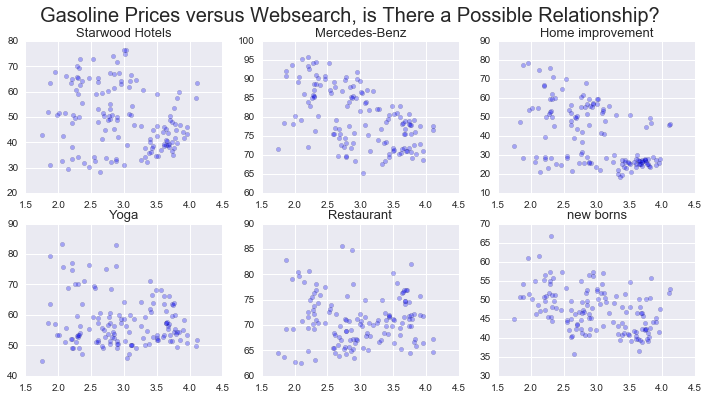

In [1047]:
plt.rcParams['figure.figsize'] = 12, 6
# the first subplot
plt.suptitle('Gasoline Prices versus Websearch, is There a Possible Relationship?', fontsize=20)
plt.subplot(231)
plt.scatter(total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'],total['Starwood Hotels and Resorts Worldwide'],alpha = 0.3)
# the second subplot (top-right)
#plt.xlabel('U.S. Gasoline Prices', fontsize=13)
plt.title('Starwood Hotels', fontsize=13)
plt.subplot(232)
plt.scatter(total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'],total['Mercedes-Benz'],alpha = 0.3)
# the third subplot (bottom-left)
plt.title('Mercedes-Benz', fontsize=13)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)
plt.subplot(233)
plt.scatter(total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'],total['Home improvement'],alpha = 0.3)
plt.title('Home improvement', fontsize=13)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)
plt.subplot(234)
plt.scatter(total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'],total['Yoga'],alpha = 0.3)
plt.title('Yoga', fontsize=13)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)
plt.subplot(235)
plt.scatter(total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'],total['Restaurant'],alpha = 0.3)
plt.title('Restaurant', fontsize=13)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)
plt.subplot(236)
plt.scatter(total['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'],total['new borns'],alpha = 0.3)
plt.title('new borns', fontsize=13)
#plt.ylabel('U.S. Gasoline Prices', fontsize=13)



In [1048]:




total.head()

,YYYY-MM,Date,Dessert,Happy hour,new borns,Organic food,Starwood Hotels and Resorts Worldwide,Yoga,Home improvement,Restaurant,Mercedes-Benz,U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,2005-01,2005-01-01,26.25,18.25,54.25,86.0,63.50,63.50,77.50,69.25,92.00,1.875
1,2005-02,2005-02-01,30.50,20.00,61.00,87.5,67.75,57.00,78.25,79.00,93.75,1.953
2,2005-03,2005-03-01,31.75,18.25,61.50,91.0,66.25,55.75,75.00,70.75,95.25,2.120
3,2005-04,2005-04-01,28.60,19.80,57.40,89.8,66.00,53.00,75.60,70.20,94.20,2.285
4,2005-05,2005-05-01,30.25,20.75,50.75,87.5,65.00,52.25,66.50,71.50,93.50,2.205


In [1049]:
class LinearRegression(object):
    
    #def __init__(self):
        
    def fit(self, X, y):
        self.colname = X.columns
        X = np.matrix(X)
        X = np.append(np.ones([X.shape[0], 1]), X, axis = 1)
        y = np.matrix(y).T
        
        beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
        err_var = np.dot((y-X*beta).T, y-X*beta)[0,0]/(X.shape[0]-X.shape[1])

        self.beta = np.array(beta).ravel()
        self.std_err = np.sqrt(err_var*np.diag(np.linalg.inv(X.T*X)))
        self.t_stat = self.beta/self.std_err
        self.p_val = map(lambda x: sp.stats.t.sf(abs(x), X.shape[0]-1)*2, self.t_stat)
        
    def summary(self):
        smy = {'Estimate':self.beta,
              'Std. Error':self.std_err,
              't value':self.t_stat,
              'Pr(>|t|)':self.p_val}
        smy_df = pd.DataFrame(smy, index=['(Intercept)']+(list(self.colname)))
        print "Coefficients:\n"
        print smy_df
        
    def predict(self, X):
        return X*np.matrix(self.beta).T

In [1053]:
total

,YYYY-MM,Date,Dessert,Happy hour,new borns,Organic food,Starwood Hotels and Resorts Worldwide,Yoga,Home improvement,Restaurant,Mercedes-Benz,U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,2005-01,2005-01-01,26.25,18.25,54.25,86.00,63.50,63.50,77.50,69.25,92.00,1.875
1,2005-02,2005-02-01,30.50,20.00,61.00,87.50,67.75,57.00,78.25,79.00,93.75,1.953
2,2005-03,2005-03-01,31.75,18.25,61.50,91.00,66.25,55.75,75.00,70.75,95.25,2.120
3,2005-04,2005-04-01,28.60,19.80,57.40,89.80,66.00,53.00,75.60,70.20,94.20,2.285
4,2005-05,2005-05-01,30.25,20.75,50.75,87.50,65.00,52.25,66.50,71.50,93.50,2.205
5,2005-06,2005-06-01,26.75,22.75,55.25,86.50,63.50,52.00,66.75,69.50,95.75,2.198
6,2005-07,2005-07-01,26.40,23.20,55.80,82.40,73.00,54.20,71.00,71.00,94.40,2.333
7,2005-08,2005-08-01,25.75,24.50,53.00,95.50,73.00,59.25,70.25,72.50,94.25,2.529
8,2005-09,2005-09-01,26.00,22.25,56.25,88.75,63.00,57.25,57.50,67.00,91.75,2.951
9,2005-10,2005-10-01,32.20,23.00,55.00,92.40,60.40,53.80,60.60,71.20,89.80,2.765


In [1057]:
lm = LinearRegression()
X = total[total.columns[11:]]
y = total['Mercedes-Benz']
lm.fit(X, y)

In [1058]:
lm.summary()

Coefficients:

                                                      Estimate      Pr(>|t|)  \
(Intercept)                                         100.658866  7.202000e-72   
U.S. All Grades All Formulations Retail Gasolin...   -6.885850  4.391508e-12   

                                                    Std. Error    t value  
(Intercept)                                           2.754794  36.539519  
U.S. All Grades All Formulations Retail Gasolin...    0.905687  -7.602901  


In [1060]:
y = total['Starwood Hotels and Resorts Worldwide']
lm.fit(X, y)
lm.summary()

Coefficients:

                                                     Estimate      Pr(>|t|)  \
(Intercept)                                         64.405183  9.869312e-24   
U.S. All Grades All Formulations Retail Gasolin...  -5.008632  4.306629e-03   

                                                    Std. Error    t value  
(Intercept)                                           5.246202  12.276534  
U.S. All Grades All Formulations Retail Gasolin...    1.724781  -2.903923  


In [1068]:
y = total['Restaurant']
lm.fit(X, y)
lm.summary()

Coefficients:

                                                     Estimate      Pr(>|t|)  \
(Intercept)                                         71.535093  1.976007e-68   
U.S. All Grades All Formulations Retail Gasolin...  -0.197125  7.745430e-01   

                                                    Std. Error    t value  
(Intercept)                                           2.089069  34.242565  
U.S. All Grades All Formulations Retail Gasolin...    0.686818  -0.287012  


In [1069]:
# Restaurant has a low p-value so we fail to reject the null hypothesis

In [1070]:
y = total['new borns']
lm.fit(X, y)
lm.summary()

Coefficients:

                                                     Estimate      Pr(>|t|)  \
(Intercept)                                         59.057641  2.169600e-55   
U.S. All Grades All Formulations Retail Gasolin...  -3.934701  3.270748e-07   

                                                    Std. Error    t value  
(Intercept)                                           2.226692  26.522592  
U.S. All Grades All Formulations Retail Gasolin...    0.732064  -5.374803  


In [1071]:
y = total['Home improvement']
lm.fit(X, y)
lm.summary()

Coefficients:

                                                     Estimate      Pr(>|t|)  \
(Intercept)                                         78.259552  8.393865e-26   
U.S. All Grades All Formulations Retail Gasolin... -12.840090  1.197090e-09   

                                                    Std. Error    t value  
(Intercept)                                           5.976090  13.095444  
U.S. All Grades All Formulations Retail Gasolin...    1.964745  -6.535246  


In [1073]:
y = total['Yoga']
lm.fit(X, y)
lm.summary()

Coefficients:

                                                     Estimate      Pr(>|t|)  \
(Intercept)                                         63.576289  4.740587e-39   
U.S. All Grades All Formulations Retail Gasolin...  -1.997271  7.786721e-02   

                                                    Std. Error    t value  
(Intercept)                                           3.419242  18.593678  
U.S. All Grades All Formulations Retail Gasolin...    1.124136  -1.776716  


In [ ]:
# Yoga p-value is 0.0778 we fail to reject the null hypothesis

In [1168]:
def Hotel_websearch (x):
    return 64.405183 + (-5.008632)*float(x)

def Benz_websearch (x):
    return 100.658866 + (-6.885850)*float(x)

def Newborns_websearch (x):
    return 59.057641 + (-3.934701)*float(x)

def HomeImprovement_websearch (x):
    return 78.259552 + (-12.840090)*float(x)

In [1139]:


forecast=final2.loc[final2.index.isin(['Retail_gas_pr'])]

In [1140]:
forecast

sum         
                 price         
date           5/18/16  5/19/16
name                           
Retail_gas_pr     2.26     2.27

In [1141]:
#forecast['AVG']= np.mean(forecast[0:2])




In [1142]:
forecast

sum         
                 price         
date           5/18/16  5/19/16
name                           
Retail_gas_pr     2.26     2.27

In [ ]:
#Dessert['WeekEnding'] = Dessert['Week'].str[13:]

#forecat['Benz'].str[13:]
#RetailGasolinePrice.agg(['Benz_websearch'])
RetailGasolinePrice
#forecast.agg(['Benz_websearch'])

In [1182]:
#forecast['5/18/16'] = final2['Autopass(cb)'] / data['TotalCB'] * 100

#forecast[5/18/2016]

test=RetailGasolinePrice


In [1186]:

#test['price']=test['price'].astype('float')

In [1185]:
#test['Benz'] = Benz_websearch(test['price'])



In [1196]:
test['Benz']=map(Benz_websearch, test['price'])

/Users/AlexandKelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1199]:
test['Starwoods']=map(Hotel_websearch, test['price'])

/Users/AlexandKelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1200]:
test

,date,name,price,Benz,Starwoods
18,5/18/16,Retail_gas_pr,2.26,85.096845,53.085675
32,5/19/16,Retail_gas_pr,2.27,85.027986,53.035588


In [1201]:
test['Newborns']=map(Newborns_websearch, test['price'])

/Users/AlexandKelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1202]:
test

,date,name,price,Benz,Starwoods,Newborns
18,5/18/16,Retail_gas_pr,2.26,85.096845,53.085675,50.165217
32,5/19/16,Retail_gas_pr,2.27,85.027986,53.035588,50.125870


In [1203]:
test['HomeImprovement']=map(HomeImprovement_websearch, test['price'])

/Users/AlexandKelly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1206]:
print test

websearchinterest.describe()

        date           name  price       Benz  Starwoods   Newborns  \
18   5/18/16  Retail_gas_pr   2.26  85.096845  53.085675  50.165217   
32   5/19/16  Retail_gas_pr   2.27  85.027986  53.035588  50.125870   

    HomeImprovement  
18        49.240949  
32        49.112548  


,Dessert,Happy hour,new borns,Organic food,Starwood Hotels and Resorts Worldwide,Yoga,Home improvement,Restaurant,Mercedes-Benz
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,40.105718,48.983820,47.320316,76.549148,49.350852,57.746472,39.881265,71.032968,80.198054
std,9.847062,19.885477,5.639550,8.621197,12.506088,8.077969,15.805991,4.903176,7.610928
min,25.750000,17.400000,35.750000,58.000000,28.250000,45.000000,18.750000,62.500000,65.250000
25%,32.250000,28.800000,42.250000,70.400000,39.000000,51.750000,26.250000,67.250000,73.250000
50%,38.500000,52.250000,46.800000,75.600000,48.000000,55.500000,30.500000,70.750000,79.200000
75%,45.500000,64.200000,51.000000,84.000000,60.400000,61.000000,53.000000,74.200000,86.500000
max,72.750000,91.333333,66.750000,95.500000,76.600000,83.400000,78.250000,85.600000,95.750000
